In [199]:
import pandas as pd
from sodapy import Socrata
import case_3_api as c3api
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import streamlit as st
from statsmodels.formula.api import ols

In [2]:

results_df = c3api.get_RDW_brandstof(limit=3000000,offset=0, where="brandstof_omschrijving='Elektriciteit'")
print(results_df.shape)
results_df.head()

(1234997, 34)


,kenteken,brandstof_volgnummer,brandstof_omschrijving,emissiecode_omschrijving,klasse_hybride_elektrisch_voertuig,uitlaatemissieniveau,geluidsniveau_rijdend,nominaal_continu_maximumvermogen,netto_max_vermogen_elektrisch,max_vermogen_60_minuten,...,brandstofverbruik_stad,co2_uitstoot_gewogen,geluidsniveau_stationair,actie_radius_extern_opladen_wltp,elektrisch_verbruik_extern_opladen_wltp,actie_radius_extern_opladen_stad_wltp,brandstof_verbruik_gewogen_gecombineerd_wltp,emis_co2_gewogen_gecombineerd_wltp,brandstof_verbruik_gecombineerd_wltp,emis_deeltjes_type1_wltp
0,00BBN1,2,Elektriciteit,Z,OVC-HEV,EURO 5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00BLT6,1,Elektriciteit,Z,NaN,NaN,78,210.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00BLZ9,1,Elektriciteit,Z,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00BNX6,1,Elektriciteit,Z,NaN,NaN,NaN,123.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00BPV3,1,Elektriciteit,Z,NaN,NaN,72,160.00,205.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
len(results_df)

1234997

In [4]:
df = c3api.get_RDW_brandstof(500000)

In [5]:
df.value_counts('brandstof_omschrijving')

brandstof_omschrijving
Benzine          413494
Diesel            71522
LPG                7580
Elektriciteit      6794
Alcohol             259
CNG                 208
LNG                 134
Waterstof             9
dtype: int64

In [6]:

print(c3api.get_RDW_brandstof(100).head())
print(c3api.get_RDW_kenteken_df(100).head())
print(c3api.get_OCM_df(100).head())

  kenteken brandstof_volgnummer brandstof_omschrijving  \
0   0001TJ                    1                Benzine   
1   0001TV                    1                Benzine   
2   0001VH                    1                Benzine   
3   0001VM                    1                Benzine   
4   0002GV                    1                 Diesel   

  emissiecode_omschrijving uitlaatemissieniveau opgegeven_maximum_snelheid  \
0                        0               EURO 0                        NaN   
1                        0               EURO 0                        NaN   
2                        0                  NaN                        NaN   
3                        0               EURO 0                        NaN   
4                      NaN                  NaN                      25.00   

  nettomaximumvermogen geluidsniveau_rijdend geluidsniveau_stationair  \
0                  NaN                   NaN                      NaN   
1                  NaN              

In [7]:
client = Socrata("opendata.rdw.nl", None)
results = client.get("m9d7-ebf2", limit=2000,offset=1)
results_df = pd.DataFrame.from_records(results)
results_df.shape

(2000, 57)

In [8]:
len(client.get_metadata("m9d7-ebf2")['columns'])

92

## Opschonen van de data

In [9]:
brandstof_elektrisch = c3api.get_RDW_brandstof(limit=3000000,offset=0, where="brandstof_omschrijving='Elektriciteit'")
brandstof_elektrisch.head()

,kenteken,brandstof_volgnummer,brandstof_omschrijving,emissiecode_omschrijving,klasse_hybride_elektrisch_voertuig,uitlaatemissieniveau,geluidsniveau_rijdend,nominaal_continu_maximumvermogen,netto_max_vermogen_elektrisch,max_vermogen_60_minuten,...,brandstofverbruik_stad,co2_uitstoot_gewogen,geluidsniveau_stationair,actie_radius_extern_opladen_wltp,elektrisch_verbruik_extern_opladen_wltp,actie_radius_extern_opladen_stad_wltp,brandstof_verbruik_gewogen_gecombineerd_wltp,emis_co2_gewogen_gecombineerd_wltp,brandstof_verbruik_gecombineerd_wltp,emis_deeltjes_type1_wltp
0,00BBN1,2,Elektriciteit,Z,OVC-HEV,EURO 5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00BLT6,1,Elektriciteit,Z,NaN,NaN,78,210.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00BLZ9,1,Elektriciteit,Z,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00BNX6,1,Elektriciteit,Z,NaN,NaN,NaN,123.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00BPV3,1,Elektriciteit,Z,NaN,NaN,72,160.00,205.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
brandstof_elektrisch.shape

(1234997, 34)

In [23]:
brandstof_elektrisch.columns

Index(['kenteken', 'brandstof_volgnummer', 'brandstof_omschrijving',
       'emissiecode_omschrijving', 'klasse_hybride_elektrisch_voertuig',
       'uitlaatemissieniveau', 'geluidsniveau_rijdend',
       'nominaal_continu_maximumvermogen', 'netto_max_vermogen_elektrisch',
       'max_vermogen_60_minuten', 'milieuklasse_eg_goedkeuring_zwaar',
       'milieuklasse_eg_goedkeuring_licht',
       'elektrisch_verbruik_enkel_elektrisch_wltp',
       'actie_radius_enkel_elektrisch_wltp',
       'actie_radius_enkel_elektrisch_stad_wltp', 'nettomaximumvermogen',
       'opgegeven_maximum_snelheid', 'co2_uitstoot_gecombineerd',
       'max_vermogen_15_minuten', 'uitstoot_deeltjes_licht',
       'toerental_geluidsniveau', 'roetuitstoot',
       'brandstofverbruik_gecombineerd', 'brandstofverbruik_buiten',
       'brandstofverbruik_stad', 'co2_uitstoot_gewogen',
       'geluidsniveau_stationair', 'actie_radius_extern_opladen_wltp',
       'elektrisch_verbruik_extern_opladen_wltp',
       'actie_ra

In [27]:
brandstof_elektrisch.isna().sum()

kenteken                                              0
brandstof_volgnummer                                  0
brandstof_omschrijving                                0
emissiecode_omschrijving                         181041
klasse_hybride_elektrisch_voertuig               549050
uitlaatemissieniveau                             351552
geluidsniveau_rijdend                            924112
nominaal_continu_maximumvermogen                 145471
netto_max_vermogen_elektrisch                    402799
max_vermogen_60_minuten                          897858
milieuklasse_eg_goedkeuring_zwaar               1234414
milieuklasse_eg_goedkeuring_licht                524442
elektrisch_verbruik_enkel_elektrisch_wltp        931822
actie_radius_enkel_elektrisch_wltp               932830
actie_radius_enkel_elektrisch_stad_wltp          933383
nettomaximumvermogen                            1234639
opgegeven_maximum_snelheid                      1218342
co2_uitstoot_gecombineerd                       

In [29]:
filtered_brandstof_elektrisch = brandstof_elektrisch[["kenteken", "brandstof_volgnummer", "brandstof_omschrijving", "emissiecode_omschrijving",
                                                      "klasse_hybride_elektrisch_voertuig", "uitlaatemissieniveau", "geluidsniveau_rijdend",
                                                       "nominaal_continu_maximumvermogen", "netto_max_vermogen_elektrisch", "max_vermogen_60_minuten", 
                                                       "milieuklasse_eg_goedkeuring_licht", "elektrisch_verbruik_enkel_elektrisch_wltp", "actie_radius_enkel_elektrisch_wltp",
                                                       "actie_radius_enkel_elektrisch_stad_wltp"
                                                      ]]
filtered_brandstof_elektrisch.shape

(1234997, 14)

In [11]:
#selectie van kolommen voor importeren RDW kenteken dataset
kenteken_columns = 'kenteken, voertuigsoort, merk, handelsbenaming,datum_tenaamstelling,inrichting,eerste_kleur, aantal_cilinders, massa_ledig_voertuig, datum_eerste_toelating, datum_eerste_tenaamstelling_in_nederland, wam_verzekerd,aantal_deuren, aantal_wielen, europese_voertuigcategorie, vermogen_massarijklaar, export_indicator, openstaande_terugroepactie_indicator, taxi_indicator, tenaamstellen_mogelijk, datum_tenaamstelling_dt, datum_eerste_toelating_dt, datum_eerste_tenaamstelling_in_nederland_dt'

In [12]:
kenteken_df = c3api.get_RDW_kenteken_df(limit = 2000000, select = kenteken_columns)
kenteken_df.head()

,kenteken,voertuigsoort,merk,handelsbenaming,datum_tenaamstelling,inrichting,eerste_kleur,aantal_cilinders,massa_ledig_voertuig,datum_eerste_toelating,...,aantal_wielen,europese_voertuigcategorie,vermogen_massarijklaar,export_indicator,openstaande_terugroepactie_indicator,taxi_indicator,tenaamstellen_mogelijk,datum_tenaamstelling_dt,datum_eerste_toelating_dt,datum_eerste_tenaamstelling_in_nederland_dt
0,PP781P,Personenauto,NISSAN,NISSAN QASHQAI,20200821,MPV,BLAUW,4,1250,20170818,...,4,M1,0.06,Nee,Nee,Nee,Ja,2020-08-21T00:00:00.000,2017-08-18T00:00:00.000,2017-08-18T00:00:00.000
1,PP781R,Personenauto,VOLKSWAGEN,LUPO,20170821,hatchback,ZWART,4,871,20051117,...,4,M1,0.04,Nee,Nee,Nee,Ja,2017-08-21T00:00:00.000,2005-11-17T00:00:00.000,2017-08-21T00:00:00.000
2,PP781S,Personenauto,FIAT,FIAT TIPO,20170828,MPV,ZWART,4,1270,20170828,...,4,M1,0.06,Nee,Nee,Nee,Ja,2017-08-28T00:00:00.000,2017-08-28T00:00:00.000,2017-08-28T00:00:00.000
3,PP781T,Personenauto,VOLKSWAGEN,TRANSPORTER,20220223,kampeerwagen,GRIJS,5,2075,20010523,...,4,M1,0.03,Nee,Nee,Nee,Ja,2022-02-23T00:00:00.000,2001-05-23T00:00:00.000,2018-05-23T00:00:00.000
4,PP781V,Personenauto,SKODA,KODIAQ,20210824,stationwagen,GRIJS,4,1446,20170825,...,4,M1,0.07,Nee,Nee,Nee,Ja,2021-08-24T00:00:00.000,2017-08-25T00:00:00.000,2017-08-25T00:00:00.000


In [38]:
kenteken_filtered = kenteken_df[['kenteken', 'voertuigsoort', 'merk', 'handelsbenaming','datum_tenaamstelling', 
                               'inrichting', 'aantal_cilinders', 
                               'massa_ledig_voertuig', 'datum_eerste_toelating', 
                               'datum_eerste_tenaamstelling_in_nederland', 'wam_verzekerd','aantal_deuren', 
                               'europese_voertuigcategorie', 'vermogen_massarijklaar', 
                               'export_indicator', 'openstaande_terugroepactie_indicator', 'taxi_indicator',
                               'tenaamstellen_mogelijk'
                               ]]
kenteken_filtered.head()

,kenteken,voertuigsoort,merk,handelsbenaming,datum_tenaamstelling,inrichting,aantal_cilinders,massa_ledig_voertuig,datum_eerste_toelating,datum_eerste_tenaamstelling_in_nederland,wam_verzekerd,aantal_deuren,europese_voertuigcategorie,vermogen_massarijklaar,export_indicator,openstaande_terugroepactie_indicator,taxi_indicator,tenaamstellen_mogelijk
0,PP781P,Personenauto,NISSAN,NISSAN QASHQAI,20200821,MPV,4,1250,20170818,20170818,Ja,4,M1,0.06,Nee,Nee,Nee,Ja
1,PP781R,Personenauto,VOLKSWAGEN,LUPO,20170821,hatchback,4,871,20051117,20170821,Ja,2,M1,0.04,Nee,Nee,Nee,Ja
2,PP781S,Personenauto,FIAT,FIAT TIPO,20170828,MPV,4,1270,20170828,20170828,Ja,5,M1,0.06,Nee,Nee,Nee,Ja
3,PP781T,Personenauto,VOLKSWAGEN,TRANSPORTER,20220223,kampeerwagen,5,2075,20010523,20180523,Ja,3,M1,0.03,Nee,Nee,Nee,Ja
4,PP781V,Personenauto,SKODA,KODIAQ,20210824,stationwagen,4,1446,20170825,20170825,Ja,4,M1,0.07,Nee,Nee,Nee,Ja


In [39]:
kenteken_filtered.shape

(2000000, 18)

Mergen van kenteken_filtered en brandstof_df 

In [40]:
kenteken_brandstof = pd.merge(kenteken_filtered, filtered_brandstof_elektrisch, how = "inner", on = "kenteken")
kenteken_brandstof.shape

(258240, 31)

In [41]:
kenteken_brandstof.head()

,kenteken,voertuigsoort,merk,handelsbenaming,datum_tenaamstelling,inrichting,aantal_cilinders,massa_ledig_voertuig,datum_eerste_toelating,datum_eerste_tenaamstelling_in_nederland,...,klasse_hybride_elektrisch_voertuig,uitlaatemissieniveau,geluidsniveau_rijdend,nominaal_continu_maximumvermogen,netto_max_vermogen_elektrisch,max_vermogen_60_minuten,milieuklasse_eg_goedkeuring_licht,elektrisch_verbruik_enkel_elektrisch_wltp,actie_radius_enkel_elektrisch_wltp,actie_radius_enkel_elektrisch_stad_wltp
0,PP783L,Personenauto,TOYOTA,TOYOTA YARIS HYBRID,20200707,MPV,4,1060,20160201,20170912,...,NOVC-HEV,EURO 6 W,NaN,10.10,NaN,NaN,715/2007*2015/45W,NaN,NaN,NaN
1,PP787J,Personenauto,TOYOTA,TOYOTA YARIS HYBRID,20180126,MPV,4,1060,20150115,20171019,...,NOVC-HEV,EURO 6 W,NaN,10.10,NaN,NaN,715/2007*136/2014W,NaN,NaN,NaN
2,PP789G,Personenauto,TOYOTA,TOYOTA AURIS,20170922,MPV,4,1285,20160129,20170922,...,NOVC-HEV,EURO 6 W,NaN,18.00,NaN,NaN,715/2007*2015/45W,NaN,NaN,NaN
3,PP790H,Personenauto,BMW I,I3,20200228,sedan,NaN,1220,20170818,20170818,...,NaN,ZX,68,75.00,125.00,75.00,715/2007*2015/45ZX,NaN,NaN,NaN
4,PP794L,Personenauto,TOYOTA,TOYOTA YARIS HYBRID,20171005,MPV,4,1060,20160201,20171005,...,NOVC-HEV,EURO 6 W,NaN,10.10,NaN,NaN,715/2007*2015/45W,NaN,NaN,NaN


In [42]:
# omvormen van de datum kolommen
kenteken_brandstof[["datum_tenaamstelling", "datum_eerste_toelating", "datum_eerste_tenaamstelling_in_nederland"]] = kenteken_brandstof[["datum_tenaamstelling", "datum_eerste_toelating", "datum_eerste_tenaamstelling_in_nederland"]].apply(pd.to_datetime, format = "%Y%m%d")

In [45]:
kenteken_brandstof.head()

,kenteken,voertuigsoort,merk,handelsbenaming,datum_tenaamstelling,inrichting,aantal_cilinders,massa_ledig_voertuig,datum_eerste_toelating,datum_eerste_tenaamstelling_in_nederland,...,klasse_hybride_elektrisch_voertuig,uitlaatemissieniveau,geluidsniveau_rijdend,nominaal_continu_maximumvermogen,netto_max_vermogen_elektrisch,max_vermogen_60_minuten,milieuklasse_eg_goedkeuring_licht,elektrisch_verbruik_enkel_elektrisch_wltp,actie_radius_enkel_elektrisch_wltp,actie_radius_enkel_elektrisch_stad_wltp
0,PP783L,Personenauto,TOYOTA,TOYOTA YARIS HYBRID,2020-07-07,MPV,4,1060,2016-02-01,2017-09-12,...,NOVC-HEV,EURO 6 W,NaN,10.10,NaN,NaN,715/2007*2015/45W,NaN,NaN,NaN
1,PP787J,Personenauto,TOYOTA,TOYOTA YARIS HYBRID,2018-01-26,MPV,4,1060,2015-01-15,2017-10-19,...,NOVC-HEV,EURO 6 W,NaN,10.10,NaN,NaN,715/2007*136/2014W,NaN,NaN,NaN
2,PP789G,Personenauto,TOYOTA,TOYOTA AURIS,2017-09-22,MPV,4,1285,2016-01-29,2017-09-22,...,NOVC-HEV,EURO 6 W,NaN,18.00,NaN,NaN,715/2007*2015/45W,NaN,NaN,NaN
3,PP790H,Personenauto,BMW I,I3,2020-02-28,sedan,NaN,1220,2017-08-18,2017-08-18,...,NaN,ZX,68,75.00,125.00,75.00,715/2007*2015/45ZX,NaN,NaN,NaN
4,PP794L,Personenauto,TOYOTA,TOYOTA YARIS HYBRID,2017-10-05,MPV,4,1060,2016-02-01,2017-10-05,...,NOVC-HEV,EURO 6 W,NaN,10.10,NaN,NaN,715/2007*2015/45W,NaN,NaN,NaN


In [69]:
# merken in de dataset
kenteken_brandstof.groupby("merk").size().sort_values(ascending = True).head(10)

merk
LELY                1
ERON                1
REO                 1
ESCORTS/FARMTRAC    1
REGARD              1
RANSOMES            1
LEKTRO              1
M.A.N.              1
QINLING             1
KIPOR               1
dtype: int64

In [72]:
#soorten voertuigen in de dataset
kenteken_brandstof.groupby("voertuigsoort").size()

voertuigsoort
Bedrijfsauto                            3588
Driewielig motorrijtuig                  423
Land- of bosbouwtrekker                 2176
Mobiele machine                          643
Motorrijtuig met beperkte snelheid     13750
Personenauto                          237660
dtype: int64

In [84]:
#kenteken checks 
kenteken_brandstof.loc[kenteken_brandstof["merk"] == "QINLING"]

,kenteken,voertuigsoort,merk,handelsbenaming,datum_tenaamstelling,inrichting,aantal_cilinders,massa_ledig_voertuig,datum_eerste_toelating,datum_eerste_tenaamstelling_in_nederland,...,klasse_hybride_elektrisch_voertuig,uitlaatemissieniveau,geluidsniveau_rijdend,nominaal_continu_maximumvermogen,netto_max_vermogen_elektrisch,max_vermogen_60_minuten,milieuklasse_eg_goedkeuring_licht,elektrisch_verbruik_enkel_elektrisch_wltp,actie_radius_enkel_elektrisch_wltp,actie_radius_enkel_elektrisch_stad_wltp
245634,TVG94S,Motorrijtuig met beperkte snelheid,QINLING,BUGGY 48EC,2021-12-07,Niet geregistreerd,NaN,NaN,2018-06-30,2021-12-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
# nieuwe dataset met alleen bedrijfsauto's en personenauto's 
new_kenteken_brandstof = kenteken_brandstof[(kenteken_brandstof["voertuigsoort"] == "Bedrijfsauto") | (kenteken_brandstof["voertuigsoort"] == "Personenauto")]

In [82]:
new_kenteken_brandstof.isna().sum()

kenteken                                          0
voertuigsoort                                     0
merk                                              0
handelsbenaming                                   5
datum_tenaamstelling                           4581
inrichting                                        0
aantal_cilinders                              91858
massa_ledig_voertuig                              0
datum_eerste_toelating                         3653
datum_eerste_tenaamstelling_in_nederland       4571
wam_verzekerd                                     0
aantal_deuren                                   926
europese_voertuigcategorie                        0
vermogen_massarijklaar                            0
export_indicator                                  0
openstaande_terugroepactie_indicator              0
taxi_indicator                                    0
tenaamstellen_mogelijk                            0
brandstof_volgnummer                              0
brandstof_om

In [91]:
new_kenteken_brandstof.loc[new_kenteken_brandstof["aantal_cilinders"] != 0]


,kenteken,voertuigsoort,merk,handelsbenaming,datum_tenaamstelling,inrichting,aantal_cilinders,massa_ledig_voertuig,datum_eerste_toelating,datum_eerste_tenaamstelling_in_nederland,...,klasse_hybride_elektrisch_voertuig,uitlaatemissieniveau,geluidsniveau_rijdend,nominaal_continu_maximumvermogen,netto_max_vermogen_elektrisch,max_vermogen_60_minuten,milieuklasse_eg_goedkeuring_licht,elektrisch_verbruik_enkel_elektrisch_wltp,actie_radius_enkel_elektrisch_wltp,actie_radius_enkel_elektrisch_stad_wltp
0,PP783L,Personenauto,TOYOTA,TOYOTA YARIS HYBRID,2020-07-07,MPV,4,1060,2016-02-01,2017-09-12,...,NOVC-HEV,EURO 6 W,NaN,10.10,NaN,NaN,715/2007*2015/45W,NaN,NaN,NaN
1,PP787J,Personenauto,TOYOTA,TOYOTA YARIS HYBRID,2018-01-26,MPV,4,1060,2015-01-15,2017-10-19,...,NOVC-HEV,EURO 6 W,NaN,10.10,NaN,NaN,715/2007*136/2014W,NaN,NaN,NaN
2,PP789G,Personenauto,TOYOTA,TOYOTA AURIS,2017-09-22,MPV,4,1285,2016-01-29,2017-09-22,...,NOVC-HEV,EURO 6 W,NaN,18.00,NaN,NaN,715/2007*2015/45W,NaN,NaN,NaN
3,PP790H,Personenauto,BMW I,I3,2020-02-28,sedan,NaN,1220,2017-08-18,2017-08-18,...,NaN,ZX,68,75.00,125.00,75.00,715/2007*2015/45ZX,NaN,NaN,NaN
4,PP794L,Personenauto,TOYOTA,TOYOTA YARIS HYBRID,2017-10-05,MPV,4,1060,2016-02-01,2017-10-05,...,NOVC-HEV,EURO 6 W,NaN,10.10,NaN,NaN,715/2007*2015/45W,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258235,VFX61D,Bedrijfsauto,STREETSCOOTER,WORK L,2020-05-14,gesloten opbouw,NaN,1595,2020-05-14,2020-05-14,...,NaN,AX,68,51.00,NaN,NaN,715/2007*2017/1347AX,NaN,NaN,NaN
258236,VFX65G,Bedrijfsauto,VAN BLITTERSWIJK,G4 ECO-MOBILITEIT,2020-04-28,huifopbouw,NaN,1170,2020-04-28,2020-04-28,...,NaN,AX,64,10.00,16.50,NaN,715/2007*2018/1832AX,99.00,160,149
258237,VFX65N,Bedrijfsauto,LAND ROVER,DISCOVERY SPORT,2020-05-15,gesloten opbouw,4,2005,2020-05-15,2020-05-15,...,NOVC-HEV,EURO 6 DG,NaN,0.10,18.00,0.10,715/2007*2018/1832DG,NaN,NaN,NaN
258238,VFX66G,Bedrijfsauto,VAN BLITTERSWIJK,G4 ECO-MOBILITEIT,2020-04-28,huifopbouw,NaN,1170,2020-04-28,2020-04-28,...,NaN,AX,64,10.00,16.50,NaN,715/2007*2018/1832AX,99.00,160,149


In [93]:
hybride_autos = new_kenteken_brandstof.copy()

In [111]:
hybride_autos["aantal_cilinders"] = hybride_autos["aantal_cilinders"].fillna(0)

In [106]:
hybride_autos["aantal_cilinders"].astype("int")

0         4
1         4
2         4
3         0
4         4
         ..
258235    0
258236    0
258237    4
258238    0
258239    0
Name: aantal_cilinders, Length: 241248, dtype: int32

In [112]:
hybride_autos["aantal_cilinders"].unique()

array(['4', 0, '5', '6', '0', '3', '2', '8', '12'], dtype=object)

#Bepalen van verkoopresultaten van merken autos per jaar

In [178]:
top10 = new_kenteken_brandstof.groupby("merk").size().sort_values(ascending = False).head(10).index.tolist()
print(top10)

['TOYOTA', 'KIA', 'TESLA', 'VOLVO', 'AUDI', 'VOLKSWAGEN', 'HYUNDAI', 'RENAULT', 'BMW', 'FORD']


In [171]:
top10_df = new_kenteken_brandstof[new_kenteken_brandstof["merk"].isin(top10)].reset_index()
top10_df.head()

,index,kenteken,voertuigsoort,merk,handelsbenaming,datum_tenaamstelling,inrichting,aantal_cilinders,massa_ledig_voertuig,datum_eerste_toelating,...,klasse_hybride_elektrisch_voertuig,uitlaatemissieniveau,geluidsniveau_rijdend,nominaal_continu_maximumvermogen,netto_max_vermogen_elektrisch,max_vermogen_60_minuten,milieuklasse_eg_goedkeuring_licht,elektrisch_verbruik_enkel_elektrisch_wltp,actie_radius_enkel_elektrisch_wltp,actie_radius_enkel_elektrisch_stad_wltp
0,0,PP783L,Personenauto,TOYOTA,TOYOTA YARIS HYBRID,2020-07-07,MPV,4,1060,2016-02-01,...,NOVC-HEV,EURO 6 W,NaN,10.10,NaN,NaN,715/2007*2015/45W,NaN,NaN,NaN
1,1,PP787J,Personenauto,TOYOTA,TOYOTA YARIS HYBRID,2018-01-26,MPV,4,1060,2015-01-15,...,NOVC-HEV,EURO 6 W,NaN,10.10,NaN,NaN,715/2007*136/2014W,NaN,NaN,NaN
2,2,PP789G,Personenauto,TOYOTA,TOYOTA AURIS,2017-09-22,MPV,4,1285,2016-01-29,...,NOVC-HEV,EURO 6 W,NaN,18.00,NaN,NaN,715/2007*2015/45W,NaN,NaN,NaN
3,4,PP794L,Personenauto,TOYOTA,TOYOTA YARIS HYBRID,2017-10-05,MPV,4,1060,2016-02-01,...,NOVC-HEV,EURO 6 W,NaN,10.10,NaN,NaN,715/2007*2015/45W,NaN,NaN,NaN
4,6,PP795G,Personenauto,VOLVO,V60 PLUG IN HYBRID,2017-09-02,stationwagen,5,1848,2013-03-11,...,OVC-HEV,EURO 5 J,NaN,50.00,NaN,NaN,715/2007*459/2012J,NaN,NaN,NaN


In [172]:
top10_df.dropna(subset = ["datum_eerste_toelating"], inplace = True)

In [174]:
top10_df["jaar"] = pd.to_datetime(top10_df["datum_eerste_toelating"]).dt.year
top10_df["maand"] = pd.to_datetime(top10_df["datum_eerste_toelating"]).dt.month

In [188]:
filtered_top10_df = top10_df[(top10_df["jaar"] >= 2018) & (top10_df["jaar"] <= 2022)]


In [176]:
aantal_per_merk = filtered_top10_df.groupby(["merk","jaar","maand"]).size().reset_index(name="aantallen")
aantal_per_merk.head()

,merk,jaar,maand,aantallen
0,AUDI,2018,1,207
1,AUDI,2018,2,130
2,AUDI,2018,3,147
3,AUDI,2018,4,122
4,AUDI,2018,5,120


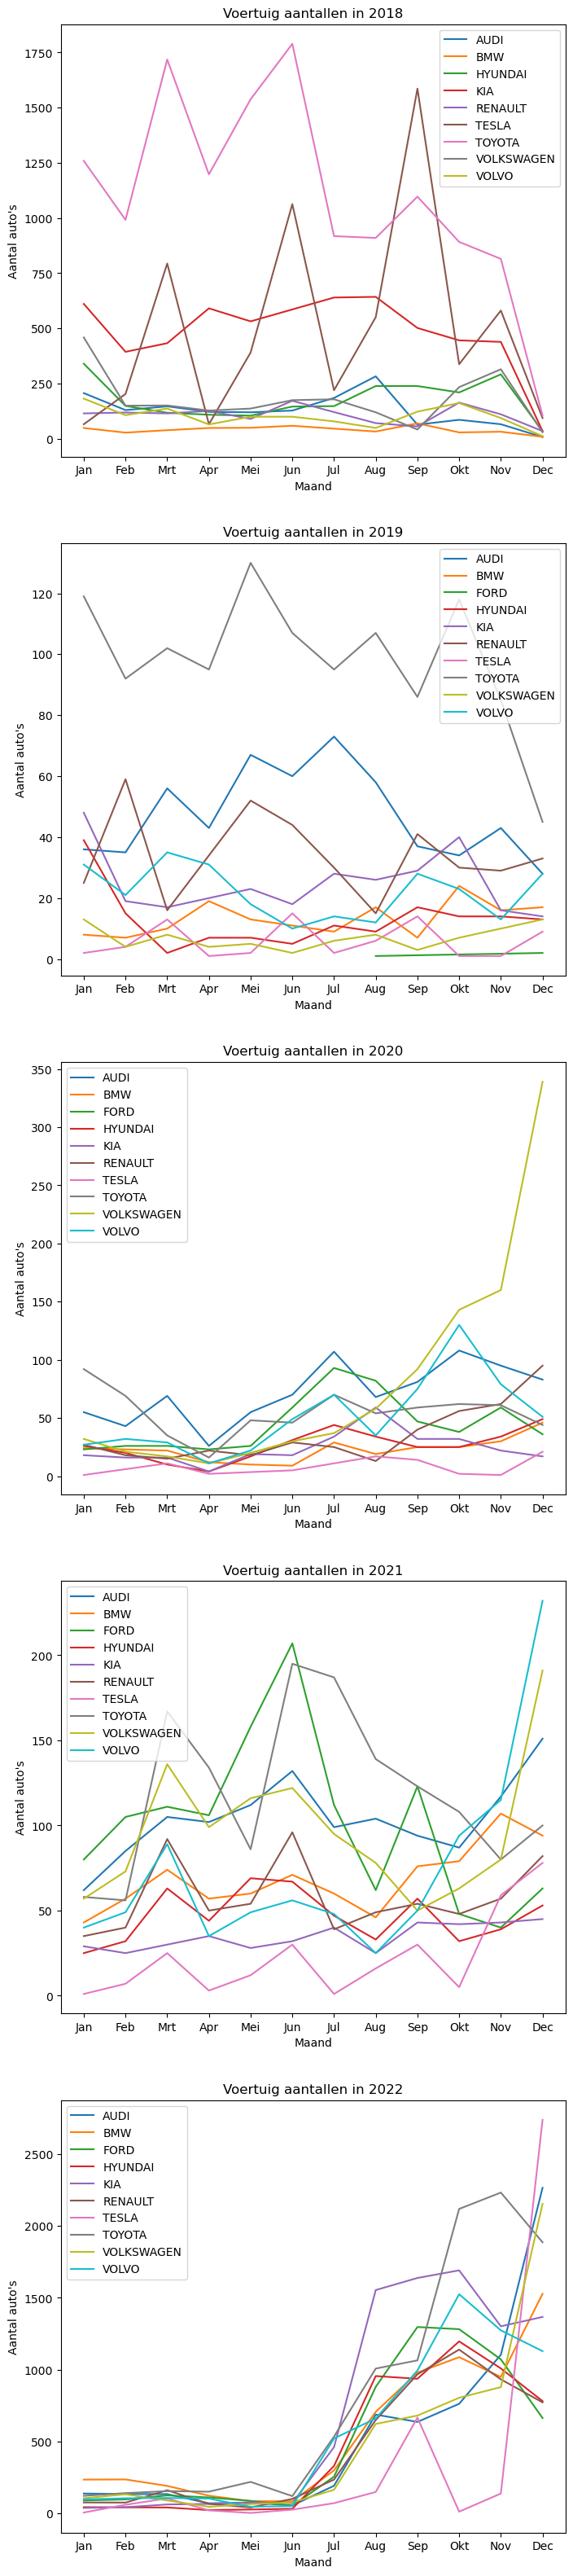

In [198]:
years = aantal_per_merk["jaar"].unique()
fig, axs = plt.subplots(len(years), 1, figsize=(8, len(years)*8))

for i, year in enumerate(years):
    data = aantal_per_merk[aantal_per_merk["jaar"] == year]
    merken = data["merk"].unique()
    for merk in merken:
        merk_data = data[data["merk"] == merk]
        axs[i].plot(merk_data["maand"], merk_data["aantallen"], label=merk)
    axs[i].set_title(f"Voertuig aantallen in {year}")
    axs[i].set_xlabel("Maand")
    axs[i].set_ylabel("Aantal auto's")
    axs[i].set_xticks(range(1, 13))
    axs[i].set_xticklabels(["Jan", "Feb", "Mrt", "Apr", "Mei", "Jun", "Jul", "Aug", "Sep", "Okt", "Nov", "Dec"])
    axs[i].legend()


plt.show()

#regessiemodellen

In [193]:
filtered_top10_df.head()

,index,kenteken,voertuigsoort,merk,handelsbenaming,datum_tenaamstelling,inrichting,aantal_cilinders,massa_ledig_voertuig,datum_eerste_toelating,...,geluidsniveau_rijdend,nominaal_continu_maximumvermogen,netto_max_vermogen_elektrisch,max_vermogen_60_minuten,milieuklasse_eg_goedkeuring_licht,elektrisch_verbruik_enkel_elektrisch_wltp,actie_radius_enkel_elektrisch_wltp,actie_radius_enkel_elektrisch_stad_wltp,jaar,maand
514,687,PR557T,Personenauto,TOYOTA,TOYOTA AURIS,2022-06-17,MPV,4,1310,2018-05-23,...,NaN,18.00,60.00,17.70,NaN,NaN,NaN,NaN,2018,5
765,1066,PS026J,Personenauto,HYUNDAI,IONIQ,2018-01-04,hatchback,NaN,1395,2018-01-04,...,NaN,25.30,NaN,NaN,NaN,NaN,NaN,NaN,2018,1
767,1068,PS027J,Personenauto,HYUNDAI,IONIQ,2022-11-13,hatchback,NaN,1395,2018-02-06,...,NaN,25.30,NaN,NaN,NaN,NaN,NaN,NaN,2018,2
776,1109,PS061F,Personenauto,HYUNDAI,IONIQ,2021-12-31,hatchback,4,1345,2018-04-19,...,NaN,10.10,NaN,NaN,NaN,NaN,NaN,NaN,2018,4
1266,1773,PS855F,Personenauto,BMW,225XE IPERFORMANCE,2022-08-20,stationwagen,3,1635,2018-01-16,...,NaN,28.00,65.00,28.00,NaN,NaN,NaN,NaN,2018,1


UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U4'), dtype('float64')) -> None

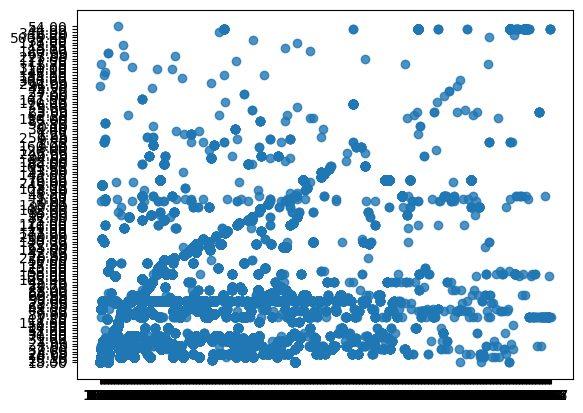

In [197]:
sns.regplot(x="massa_ledig_voertuig",
            y="nominaal_continu_maximumvermogen",
            data=filtered_top10_df,
            ci = None)